<a href="https://colab.research.google.com/github/rosanavanesavasquez/Suicide_rates_Overview/blob/main/Suicide_Rates_Overview_VASQUEZ_TrabajoFinalDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de Tasas de Suicidios**

## Abstracto y Motivación

El suicidio es un problema de salud pública de gran relevancia a nivel mundial, con profundas implicaciones sociales, económicas y de bienestar.  
A través del análisis de datos históricos de tasas de suicidio, es posible identificar patrones y factores asociados que pueden contribuir a la formulación de políticas de prevención más efectivas.

Este análisis está dirigido a:
- Profesionales de la salud mental y políticas públicas  
- Investigadores en ciencias sociales y economía  
- El público en general

El objetivo de este trabajo es responder preguntas clave sobre la relación entre el suicidio y factores socioeconómicos, explorando tendencias en distintas regiones del mundo.

## **Preguntas/Hipótesis a responder**

1. ¿Cómo han evolucionado las tasas de suicidio a lo largo del tiempo?
2. ¿Existen diferencias significativas en las tasas de suicidio según género y edad?
3. ¿Cuál es la relación entre factores económicos (PIB per cápita, IDH) y el número de suicidios?
4. ¿Qué países presentan las tasas de suicidio más altas y cuáles han logrado reducirlas?

# Suicide_Rates_Overview_VASQUEZ_1eraEntrega.ipynb

Original file is located at
    https://colab.research.google.com/drive/19A50fy09MOoitulAqZZoxAwV6LeMGK2L
"""

In [3]:
# Montamos en Google Drive en Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [5]:
# Ruta del dataset
dataset_path = '/content/gdrive/MyDrive/CODER HOUSE/DATA_SET/Suicide_Rates_Overview/master_Suicide_rates.csv'

# Cargar el dataset
df = pd.read_csv(dataset_path)

In [6]:
# Inspección inicial de los datos
print(df.head())
print(df.info())
print("Valores nulos por columna:\n", df.isnull().sum())


   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [7]:
# Revisar valores únicos para variables categóricas
for col in ['country', 'sex', 'age', 'generation']:
    print(f"Valores únicos en {col}: {df[col].unique()}")

Valores únicos en country: ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Sl

## Análisis preliminar de variables

Antes de aplicar técnicas de limpieza y transformación, es importante comprender la estructura de los datos y evaluar su calidad.  
Las siguientes acciones permitirán detectar valores faltantes, inconsistencias, duplicados o posibles outliers.  
Esto garantiza que los modelos de Machine Learning se construyan sobre datos confiables.

En esta etapa se evaluará:
- La cantidad y tipo de datos por columna
- La presencia de valores nulos o duplicados
- La distribución de las variables numéricas
- Variables categóricas con alta cardinalidad

#Limpieza y Transformación de Datos

In [49]:
# --- 1. Limpieza y Transformación de Datos ---
# Eliminación de valores nulos en columnas críticas
df.dropna(subset=['suicides_no', 'suicides/100k pop'], inplace=True)

In [50]:
# Tratamiento de HDI for year: Relleno con la media del país si hay datos
hdi_mean = df.groupby('country')['HDI for year'].transform(lambda x: x.fillna(x.mean()))
df['HDI for year'] = np.where(df['HDI for year'].isnull(), hdi_mean, df['HDI for year'])

In [51]:
# Conversión de tipos de datos
df['year'] = df['year'].astype(int)
df['suicides_no'] = df['suicides_no'].astype(int)
df['suicides/100k pop'] = df['suicides/100k pop'].astype(float)

#Análisis Exploratorio de Datos (EDA)

## Visualización de tendencias generales

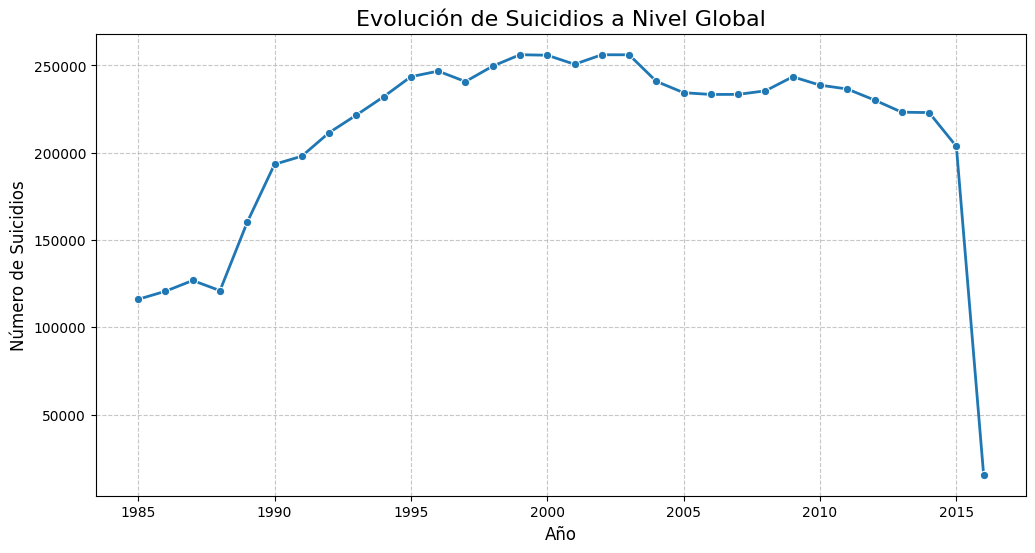

In [52]:

## Visualización de tendencias generales
grafico_suicidios = df.groupby('year')['suicides_no'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=grafico_suicidios, x='year', y='suicides_no', marker='o', linewidth=2)
plt.title("Evolución de Suicidios a Nivel Global", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Suicidios", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##Mapa de calor de tasas de suicidio por país

In [53]:
## Mapa de calor de tasas de suicidio por país
suicide_rate_by_country = df.groupby('country')['suicides/100k pop'].mean().reset_index()
fig = px.choropleth(
    suicide_rate_by_country,
    locations="country",
    locationmode="country names",
    color="suicides/100k pop",
    title="Mapa de Calor: Tasa Promedio de Suicidios por País",
    color_continuous_scale="Reds"
)
fig.show()

## Comparación por género

<ipython-input-54-00f9943c6735>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




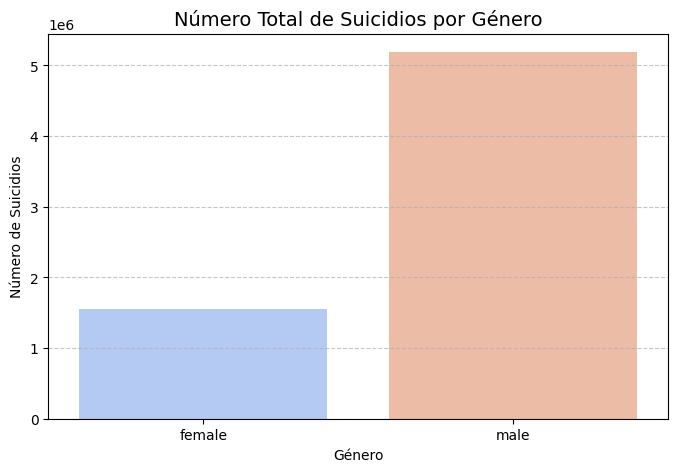

In [54]:
## Comparación por género
grafico_genero = df.groupby('sex')['suicides_no'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=grafico_genero, x='sex', y='suicides_no', palette='coolwarm')
plt.title("Número Total de Suicidios por Género", fontsize=14)
plt.xlabel("Género")
plt.ylabel("Número de Suicidios")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Comparación por país

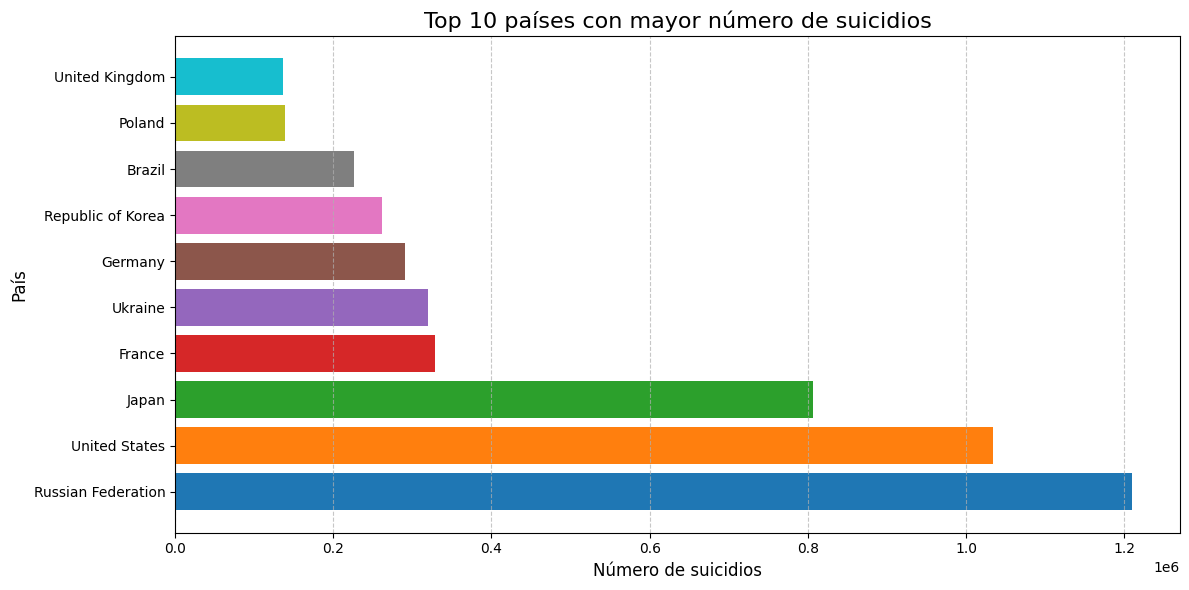

In [14]:
# Calcular el total de suicidios por país
suicides_by_country = df.groupby('country')['suicides_no'].sum().reset_index()

# Ordenar los países por número de suicidios y seleccionar los 10 principales
top_countries = suicides_by_country.sort_values(by='suicides_no', ascending=False).head(10)

# Crear un gráfico con colores definidos manualmente
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.barh(top_countries['country'], top_countries['suicides_no'], color=colors)

# Personalización del gráfico
plt.title("Top 10 países con mayor número de suicidios", fontsize=16)
plt.xlabel("Número de suicidios", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Comparación por edad

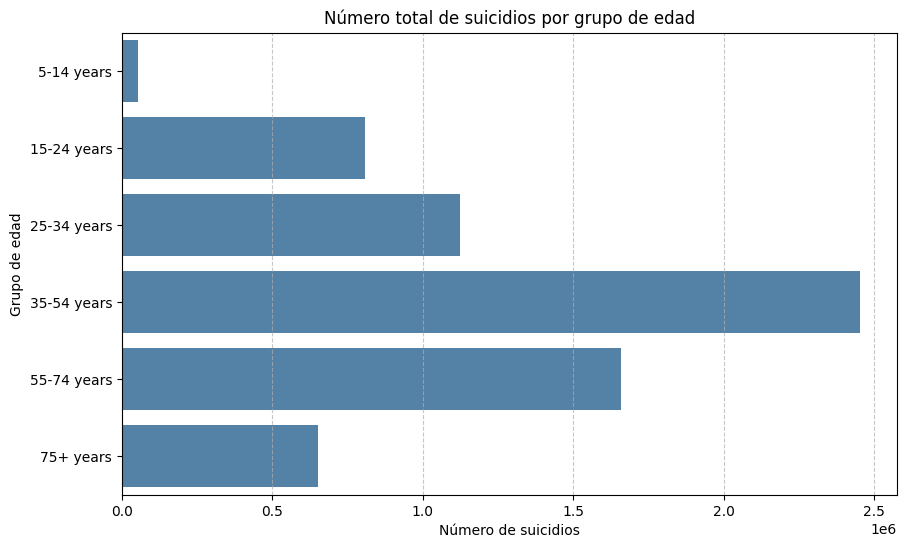

In [15]:
# Calcular el total de suicidios por grupo de edad
suicides_by_age = df.groupby('age')['suicides_no'].sum().reset_index()

# Ordenar los grupos de edad
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=suicides_by_age, x='suicides_no', y='age', order=age_order, color='steelblue')
plt.title("Número total de suicidios por grupo de edad")
plt.xlabel("Número de suicidios")
plt.ylabel("Grupo de edad")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Correlación entre variables económicas y suicidios

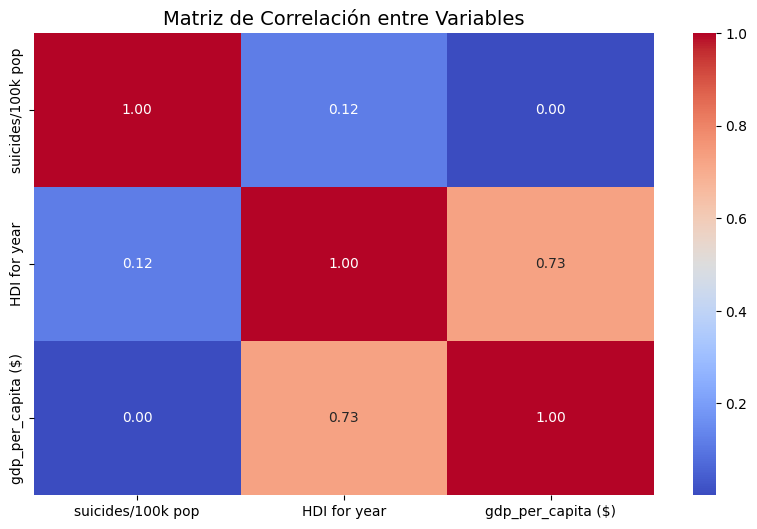

In [16]:
## Correlación entre variables económicas y suicidios
plt.figure(figsize=(10, 6))
corr_matrix = df[['suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables", fontsize=14)
plt.show()

#Conclusiones del Análisis

## Insights preliminares del análisis exploratorio

- La tasa de suicidios presenta variaciones marcadas a lo largo del tiempo, con diferencias según región.
- Los hombres tienen tasas de suicidio significativamente más altas que las mujeres en casi todos los grupos etarios.
- Se evidencian diferencias por generación y edad, siendo los grupos mayores más vulnerables.
- Existe una correlación entre PIB per cápita y tasas de suicidio, pero no necesariamente en forma lineal.
- Países con alto IDH también presentan tasas elevadas, lo cual indica que el bienestar económico no es el único factor asociado.

Estos hallazgos nos llevan a requerir un análisis más profundo mediante técnicas de aprendizaje automático.


## Ingeniería de Atributos



In [30]:
# Nueva variable: suicidios por 100k habitantes ajustados al PIB
df['suicides_per_100k_gdp'] = df['suicides/100k pop'] / df['gdp_per_capita ($)']


B. Normalización / Escalado

In [31]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos columnas numéricas que usaremos para modelado
numeric_cols = ['gdp_per_capita ($)', 'HDI for year', 'suicides/100k pop']

# Estandarizamos y agregamos al DataFrame con sufijo _scaled
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaled_values, columns=[col + '_scaled' for col in numeric_cols])

# Ajusto al dataset original
df = pd.concat([df, scaled_df], axis=1)


Encoding de variables categóricas

In [32]:
# Encoding de variables categóricas
df_encoded = pd.get_dummies(df, columns=['sex', 'generation', 'age'], drop_first=True)


ESCALADO DE VARIABLES NUMÉRICAS

In [33]:
from sklearn.preprocessing import StandardScaler

# Definir columnas numéricas a escalar
numeric_cols = ['gdp_per_capita ($)', 'HDI for year', 'suicides/100k pop']

# Crear el scaler
scaler = StandardScaler()

# Ajustar y transformar los datos
scaled_values = scaler.fit_transform(df[numeric_cols])

# Crear un DataFrame con las columnas escaladas
scaled_df = pd.DataFrame(scaled_values, columns=[col + '_scaled' for col in numeric_cols])

# Concatenar con el DataFrame original
df = pd.concat([df.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)



# ENCODING DE VARIABLES CATEGÓRICAS

Realizar encoding con get_dummies en columnas seleccionadas

Mostrar algunas columnas del resultado



In [34]:
df_encoded = pd.get_dummies(df, columns=['sex', 'generation', 'age'], drop_first=True)

df_encoded.head()


,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),suicides_per_100k_gdp,...,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
0,Albania,1987,21,312900,6.71,Albania1987,0.673,"2,156,624,900",0.004322,1552.546257,...,False,True,False,False,False,False,False,False,False,False
1,Albania,1987,16,308000,5.19,Albania1987,0.673,"2,156,624,900",0.004322,1200.851725,...,False,False,False,False,True,False,True,False,False,False
2,Albania,1987,14,289700,4.83,Albania1987,0.673,"2,156,624,900",0.004322,1117.555651,...,False,True,False,False,False,False,False,False,False,False
3,Albania,1987,1,21800,4.59,Albania1987,0.673,"2,156,624,900",0.004322,1062.024936,...,True,False,False,False,False,False,False,False,False,True
4,Albania,1987,9,274300,3.28,Albania1987,0.673,"2,156,624,900",0.004322,758.919780,...,False,False,False,False,False,True,False,False,False,False


In [35]:
df_encoded.columns


Index(['country', 'year', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'suicides_per_100k_gdp',
       'gdp_per_capita ($)_scaled', 'HDI for year_scaled',
       'suicides/100k pop_scaled', 'gdp_per_capita ($)_scaled',
       'HDI for year_scaled', 'suicides/100k pop_scaled', 'grupo_edad',
       'suicide_rate_per_100k', 'sexo_cod', 'grupo_edad_cod',
       'gdp_per_capita ($)_scaled', 'HDI for year_scaled',
       'suicides/100k pop_scaled', 'gdp_per_capita ($)_scaled',
       'HDI for year_scaled', 'suicides/100k pop_scaled', 'sex_male',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials', 'generation_Silent',
       'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years'],
      dtype='object')

## Bloque de entrenamiento y evaluación para un modelo de regresión

OBJETIVO
Predecir la variable suicides/100k pop_scaled (ya que la escalaste), usando como features las variables económicas, demográficas y sintéticas.

Vamos a usar:

train_test_split para dividir los datos

LinearRegression como primer modelo

Métricas: MAE, RMSE, R²

SEPARACIÓN EN TRAIN Y TEST

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop(columns=[
    'suicides/100k pop', 'suicides/100k pop_scaled',
    'suicides_no', 'population', 'country', 'country-year'
])
y = df_encoded['suicides/100k pop_scaled']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
df.columns.tolist()


['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation',
 'suicides_per_100k_gdp',
 'gdp_per_capita ($)_scaled',
 'HDI for year_scaled',
 'suicides/100k pop_scaled',
 'gdp_per_capita ($)_scaled',
 'HDI for year_scaled',
 'suicides/100k pop_scaled',
 'grupo_edad',
 'suicide_rate_per_100k',
 'sexo_cod',
 'grupo_edad_cod',
 'gdp_per_capita ($)_scaled',
 'HDI for year_scaled',
 'suicides/100k pop_scaled',
 'gdp_per_capita ($)_scaled',
 'HDI for year_scaled',
 'suicides/100k pop_scaled']

## REVISAR - BORRAR

In [38]:
# ENTRENAMIENTO DEL MODELO

model = LinearRegression()
model.fit(X_train, y_train)

# PREDICCIÓN Y EVALUACIÓN


y_pred = model.predict(X_test)

# Métricas de performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

ValueError: could not convert string to float: '189,719,984,268'

## REVISAR - BORRAR

In [39]:
def agrupar_edad(edad):
    if "5-14" in edad or "15-24" in edad:
        return "joven"
    elif "25-54" in edad:
        return "adulto"
    else:
        return "anciano"

df['grupo_edad'] = df['age'].apply(agrupar_edad)


In [40]:
df['suicide_rate_per_100k'] = (df['suicides_no'] / df['population']) * 100000


In [41]:
le = LabelEncoder()
df['sexo_cod'] = le.fit_transform(df['sex'])
df['grupo_edad_cod'] = le.fit_transform(df['grupo_edad'])


Normalización de variables numéricas

In [42]:
scaler = MinMaxScaler()
df[['gdp_per_capita ($)', 'suicide_rate_per_100k']] = scaler.fit_transform(df[['gdp_per_capita ($)', 'suicide_rate_per_100k']])


Confirmamos los nuevos features

In [43]:
df[['sex', 'sexo_cod', 'age', 'grupo_edad', 'grupo_edad_cod', 'gdp_per_capita ($)', 'suicide_rate_per_100k']].head()


,sex,sexo_cod,age,grupo_edad,grupo_edad_cod,gdp_per_capita ($),suicide_rate_per_100k
0,male,1,15-24 years,joven,1,0.004322,0.029832
1,male,1,35-54 years,anciano,0,0.004322,0.023091
2,female,0,15-24 years,joven,1,0.004322,0.021481
3,male,1,75+ years,anciano,0,0.004322,0.020390
4,male,1,25-34 years,anciano,0,0.004322,0.014584


Variables disponibles para el modelo


In [44]:
features = ['sexo_cod', 'grupo_edad_cod', 'gdp_per_capita ($)', 'population'] + [col for col in df.columns if 'generation_' in col]
target = 'suicide_rate_per_100k'


Selección de variables (X) y target (y)

In [45]:
from sklearn.model_selection import train_test_split

# Seleccionamos features numéricos y codificados
features = ['sexo_cod', 'grupo_edad_cod', 'population', 'gdp_per_capita ($)'] + \
           [col for col in df.columns if col.startswith('generation_')]

X = df[features]
y = df['suicide_rate_per_100k']


División en entrenamiento y test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


Validación con K-Fold (opcional si lo hacés en el modelo, pero útil para ir viendo la estructura)

In [47]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}:")
    print(f"  Train size: {len(train_idx)} - Val size: {len(val_idx)}")


Fold 1:
  Train size: 17804 - Val size: 4452
Fold 2:
  Train size: 17805 - Val size: 4451
Fold 3:
  Train size: 17805 - Val size: 4451
Fold 4:
  Train size: 17805 - Val size: 4451
Fold 5:
  Train size: 17805 - Val size: 4451


Entrenamiento con Random Forest + Grid Search

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definimos el modelo
rf = RandomForestRegressor(random_state=42)

# Hiperparámetros a tunear
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# Grid search
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_rf.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_rf.best_estimator_
print("Mejores hiperparámetros Random Forest:", grid_rf.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir el modelo base
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hiperparámetros a probar
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Grid Search
grid_xgb = GridSearchCV(estimator=xgb,
                        param_grid=param_grid_xgb,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

# Entrenamiento
grid_xgb.fit(X_train, y_train)

# Mejor estimador
best_xgb = grid_xgb.best_estimator_
print("Mejores hiperparámetros XGBoost:", grid_xgb.best_params_)


In [ ]:
# Predicciones
y_pred_xgb = best_xgb.predict(X_test)

# Métricas
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.4f}")
print(f"XGBoost - MSE: {mse_xgb:.4f}")
print(f"XGBoost - R²: {r2_xgb:.4f}")
